Bollinger bands infy:  1.0
Bollinger bands tcs:  0.9852631578947368
2nd prob :  0.7962962962962963


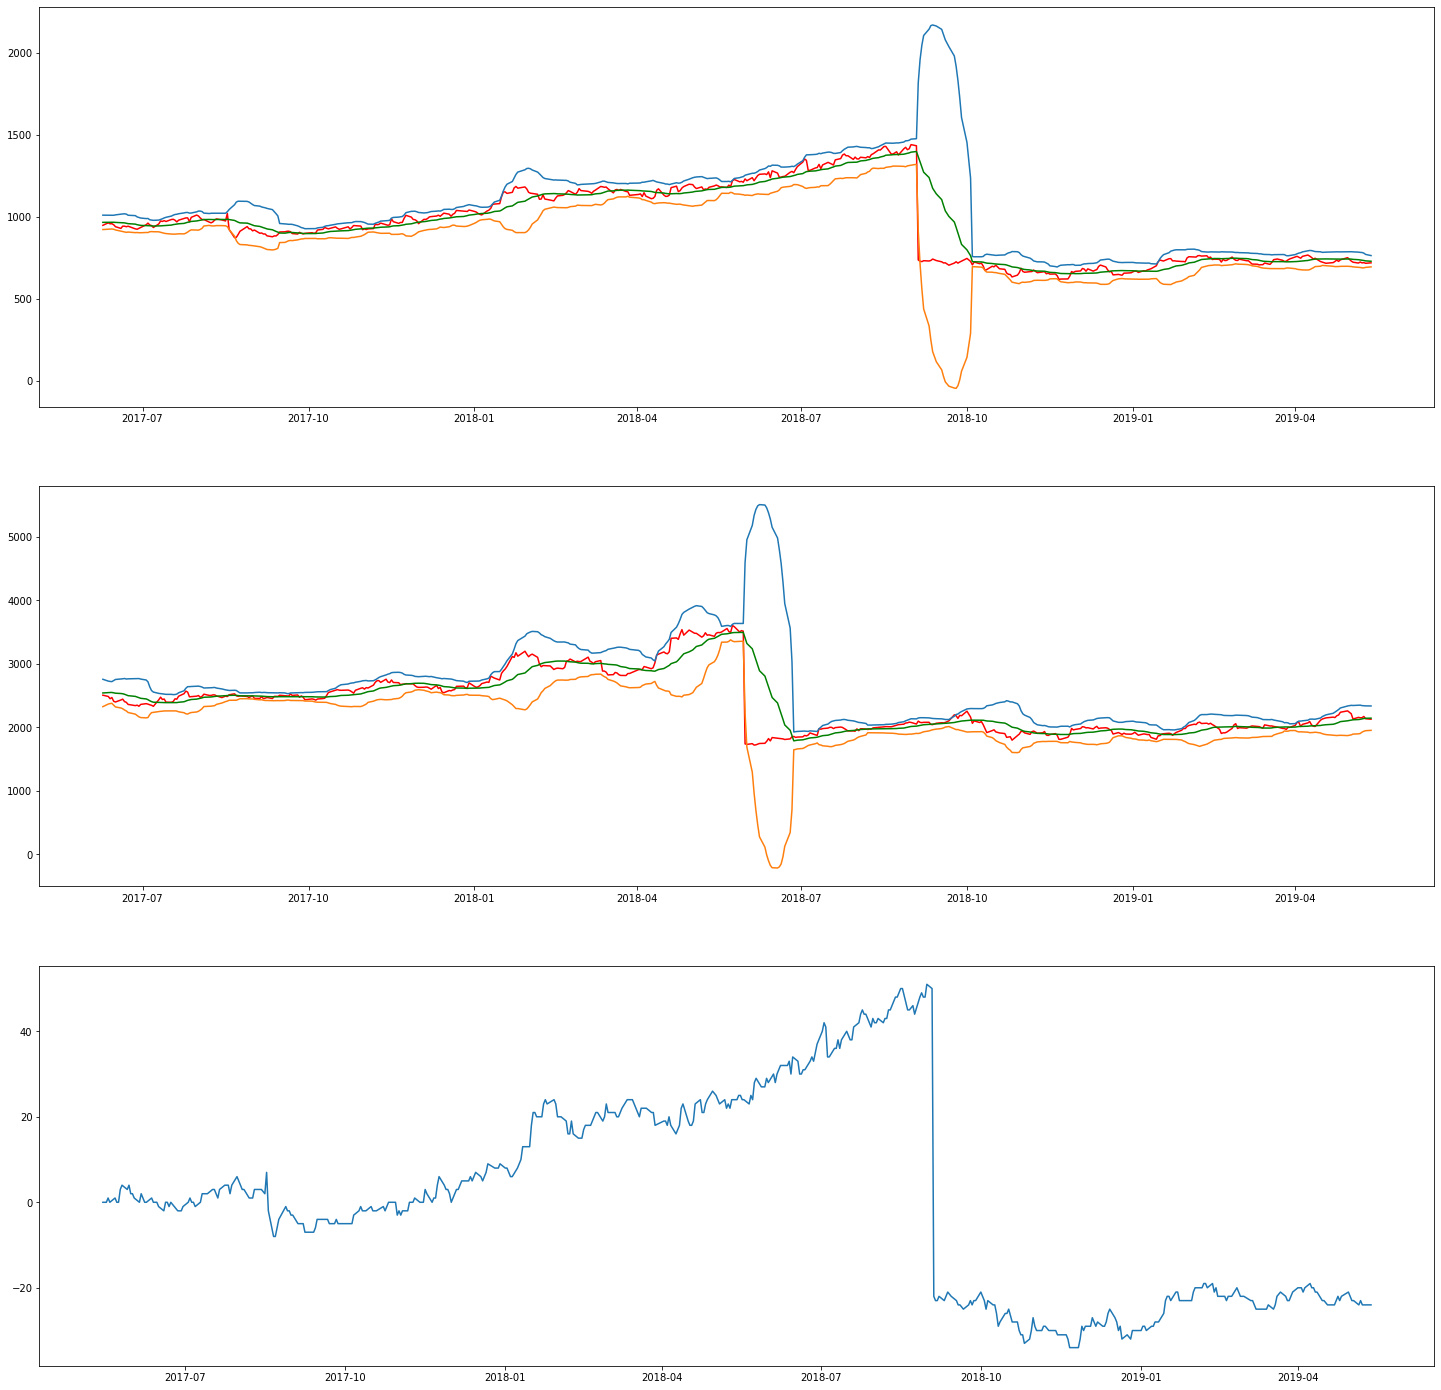

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jul 27 14:30:50 2020

@author: Jawahar
"""
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

df=pd.read_csv('week2.csv')
fig,ax=plt.subplots(3,figsize=(25,25)) 
df.set_index(pd.DatetimeIndex(df.Date),inplace=True)
df['middleband']=df['Close Price'].rolling(20).mean()
df['upperband']=df['Close Price'].rolling(20).mean()+(3*df['Close Price'].rolling(20).std())
df['lowerband']=df['Close Price'].rolling(20).mean()-(3*df['Close Price'].rolling(20).std())
infy=df[df.lowerband.notnull()]
infy['Call']=''
for i in range(len(infy)):
    if infy['Close Price'][i]>=infy['upperband'][i]:
        infy['Call'][i]='Buy'
        
    elif infy['Close Price'][i]>=infy['middleband'][i] and infy['Close Price'][i]<infy['upperband'][i]:
        infy['Call'][i]='Hold Buy / Liquidate Short'
        
    elif infy['Close Price'][i]>=infy['lowerband'][i] and infy['Close Price'][i]<infy['middleband'][i]:
        infy['Call'][i]='Hold Short / Liquidate Buy'
        
    elif infy['Close Price'][i]<infy['lowerband'][i]:
        infy['Call'][i]='Short'
ax[0].plot(infy.index,infy['Close Price'],color='red')
ax[0].plot(infy.index,infy['upperband'])
ax[0].plot(infy.index,infy['lowerband'])
ax[0].plot(infy.index,infy['middleband'],color='green')
X=infy[['Close Price','lowerband','middleband','upperband']]
y=infy['Call'].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model=SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accu=accuracy_score(y_test,y_pred)
print("Bollinger bands infy: ",accu)

#new csv
dfn=pd.read_csv('TCS.csv')
dfn.set_index(pd.DatetimeIndex(dfn.Date),inplace=True)
dfn=dfn[dfn.Series=='EQ']
dfn['middleband']=dfn['Close Price'].rolling(20).mean()
dfn['upperband']=dfn['Close Price'].rolling(20).mean()+(3*dfn['Close Price'].rolling(20).std())
dfn['lowerband']=dfn['Close Price'].rolling(20).mean()-(3*dfn['Close Price'].rolling(20).std())
tcs=dfn[dfn.lowerband.notnull()]
tcs['Call']=''
for i in range(len(tcs)):
    if tcs['Close Price'][i]>=tcs['upperband'][i]:
        tcs['Call'][i]='Buy'
        
    elif tcs['Close Price'][i]>=tcs['middleband'][i] and tcs['Close Price'][i]<tcs['upperband'][i]:
        tcs['Call'][i]='Hold Buy / Liquidate Short'
        
    elif tcs['Close Price'][i]>=tcs['lowerband'][i] and tcs['Close Price'][i]<tcs['middleband'][i]:
        tcs['Call'][i]='Hold Short / Liquidate Buy'
        
    elif tcs['Close Price'][i]<tcs['lowerband'][i]:
        tcs['Call'][i]='Short'
ax[1].plot(tcs.index,tcs['Close Price'],color='red')
ax[1].plot(tcs.index,tcs['upperband'])
ax[1].plot(tcs.index,tcs['lowerband'])
ax[1].plot(tcs.index,tcs['middleband'],color='green')
X=tcs[['Close Price','lowerband','middleband','upperband']]
y=tcs['Call'].as_matrix()
y_pred=model.predict(X)
accu1=accuracy_score(y,y_pred)
print("Bollinger bands tcs: ",accu1)

#Trade calls
df['%op-cl']=(df['Close Price']-df['Open Price'])/df['Open Price']*100
df['%lo-hi']=(df['High Price']-df['Low Price'])/df['Low Price']*100
df['roll_mean']=df['Day_Perc_Change'].rolling(5).mean()
df['roll_std']=df['Day_Perc_Change'].rolling(5).std()
df['Action']=0
for i in range(1,len(df)):
    if df['Close Price'][i]>=df['Close Price'][i-1]:
        df['Action'][i]=1
    else:
        df['Action'][i]=-1
infy=df[df.roll_mean.notnull()]
X=infy[['%op-cl','%lo-hi','roll_mean','roll_std']]
y=infy['Action'].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model=SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accu=accuracy_score(y_test,y_pred)
print("2nd prob : ",accu)
    
#cumulative return

df['Cum_return']=0
for i in range(1,len(df)):
    df['Cum_return'][i]=((df['Close Price'][i]/df['Close Price'][0])-1)*100
ax[2].plot(df.index,df.Cum_return)




